<a href="https://colab.research.google.com/github/javiermto/TELECOMX_CHALLENGE_ALURALATAM/blob/main/TELECONCHALLENGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXTRACCIÓN

## IMPORTANDO DATOS

In [1]:
# Iniciamos importando libreria pandas
import pandas as pd

In [2]:
#importamos los datos de un archivo json
df=pd.read_json('/content/drive/MyDrive/Colab Notebooks/archivos colab/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# TRANSFORMACIÓN

## Despliegue de los datos

In [3]:
# Convertimos el df bruto a una lista que json_normalize pueda entender
df_tel = pd.json_normalize(df.to_dict('records'), sep='.')
df_tel.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
#identificando el tipo de datos
df_tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [5]:
#convirtiendo el total a numerico
# errors='coerce' para que cualquier celda con espacios vacíos se convierta en un valor nulo (NaN), evitando que el código se detenga por errores.
df_tel['account.Charges.Total'] = pd.to_numeric(df_tel['account.Charges.Total'], errors='coerce')

In [6]:
# Verificando si se crearon valores nulos tras la conversión
print(f"Valores nulos encontrados en Total: {df_tel['account.Charges.Total'].isnull().sum()}")

Valores nulos encontrados en Total: 11


In [7]:
#como tenemos 11 valores nulosm se llenaran con cero
df_tel['account.Charges.Total'].fillna(0)

,account.Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40
...,...
7262,742.90
7263,1873.70
7264,92.75
7265,4627.65


In [8]:
# verificamos si se reemplazaron con cero
df_tel['account.Charges.Total'].describe()   # el valor minimo debe ser cero

,account.Charges.Total
count,7256.000000
mean,2280.634213
std,2268.632997
min,18.800000
25%,400.225000
50%,1391.000000
75%,3785.300000
max,8684.800000


In [9]:
# Xomo el df tiene prefijos (customer, internet, account)
# Eliminamos los prefijos de todas las columnas automáticamente
df_tel.columns = [col.split('.')[-1] for col in df_tel.columns]

# Ajuste manual para que los cargos mantengan el nombre del diccionario
df_tel = df_tel.rename(columns={
    'Monthly': 'Charges.Monthly',
    'Total': 'Charges.Total'
})

# Verificamos
df_tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [10]:
df_tel.head()     # tenemos un df limpio por el momento

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


### Comprobación de incoherencias en los datos

In [11]:
# Verificar duplicados totales
duplicados = df_tel.duplicated().sum()
print(f"Filas duplicadas: {duplicados}")


Filas duplicadas: 0


In [12]:
# Resumen de valores nulos por columna
print("\nValores ausentes por columna:")
print(df_tel.isnull().sum())


Valores ausentes por columna:
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64


In [13]:
#revision en el texto de la columna gender de texto, posibles inconsistencias
#mayuculas o espacios
df_tel['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
# verificación de las demas columnas de texto
for col in df_tel.select_dtypes(include=['object']).columns:
    if col != 'customerID': # Saltamos el ID porque es único
        print(f"Valores en {col}: {df_tel[col].unique()}")

Valores en Churn: ['No' 'Yes' '']
Valores en gender: ['Female' 'Male']
Valores en Partner: ['Yes' 'No']
Valores en Dependents: ['Yes' 'No']
Valores en PhoneService: ['Yes' 'No']
Valores en MultipleLines: ['No' 'Yes' 'No phone service']
Valores en InternetService: ['DSL' 'Fiber optic' 'No']
Valores en OnlineSecurity: ['No' 'Yes' 'No internet service']
Valores en OnlineBackup: ['Yes' 'No' 'No internet service']
Valores en DeviceProtection: ['No' 'Yes' 'No internet service']
Valores en TechSupport: ['Yes' 'No' 'No internet service']
Valores en StreamingTV: ['Yes' 'No' 'No internet service']
Valores en StreamingMovies: ['No' 'Yes' 'No internet service']
Valores en Contract: ['One year' 'Month-to-month' 'Two year']
Valores en PaperlessBilling: ['Yes' 'No']
Valores en PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [15]:
# verificacion de valores negativos en columnas
df_tel[['tenure', 'Charges.Monthly', 'Charges.Total']].describe()

,tenure,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7256.000000
mean,32.346498,64.720098,2280.634213
std,24.571773,30.129572,2268.632997
min,0.000000,18.250000,18.800000
25%,9.000000,35.425000,400.225000
50%,29.000000,70.300000,1391.000000
75%,55.000000,89.875000,3785.300000
max,72.000000,118.750000,8684.800000


In [16]:
#generando la columna cuentas diarias
df_tel['Charges.Daily'] = df_tel['Charges.Monthly'] / 30
df_tel.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [17]:
#tenemos muchos decimales en la columna nueva, reduciendo a 2 decimales
df_tel['Charges.Daily'] = df_tel['Charges.Daily'].round(2)
df_tel.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


## Estandarizando el nombre las columnas

In [18]:
# Convertimos todos los nombres de las columnas a minúsculas
df_tel.columns = df_tel.columns.str.lower()

# Verificamos
print(df_tel.columns.tolist())

['customerid', 'churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'charges.monthly', 'charges.total', 'charges.daily']


aqui noté que en el codigo de arriba churm tiene valores nulos

In [19]:
# Contamos cuántas filas tienen el string vacío en churn
vacios_churn = (df_tel['churn'] == '').sum()
print(f"Cantidad de filas en churn vacias: {vacios_churn}")

Cantidad de filas en churn vacias: 224


como son 224 celdas vacias de la columna churm que es una de las principales a analizar, en lugar de borrarlas las etiquetaré como "uknown" desconocido, ya que se usara para un analisis de datos

In [20]:
df_tel['churn'] = df_tel['churn'].replace('', 'unknown')
print(df_tel['churn'].value_counts())

churn
No         5174
Yes        1869
unknown     224
Name: count, dtype: int64


In [21]:
df_tel.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,charges.daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


# CARGA Y ANALISIS

## Analisis descriptivo

In [22]:
#estadisticas descriptivas de las variables cuantitativas
columnas_cuantitativas = ['tenure', 'charges.monthly', 'charges.total', 'charges.daily']

est_descriptivas = df_tel[columnas_cuantitativas].describe()
est_descriptivas


,tenure,charges.monthly,charges.total,charges.daily
count,7267.000000,7267.000000,7256.000000,7267.000000
mean,32.346498,64.720098,2280.634213,2.157292
std,24.571773,30.129572,2268.632997,1.004407
min,0.000000,18.250000,18.800000,0.610000
25%,9.000000,35.425000,400.225000,1.180000
50%,29.000000,70.300000,1391.000000,2.340000
75%,55.000000,89.875000,3785.300000,2.995000
max,72.000000,118.750000,8684.800000,3.960000


In [23]:
# 1. Llenamos los 11 valores nulos  de cargos totales con 0
df_tel['charges.total'] = df_tel['charges.total'].fillna(0)

est_descriptivas = df_tel[columnas_cuantitativas].describe()
est_descriptivas

,tenure,charges.monthly,charges.total,charges.daily
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157292
std,24.571773,30.129572,2268.648587,1.004407
min,0.000000,18.250000,0.000000,0.610000
25%,9.000000,35.425000,396.200000,1.180000
50%,29.000000,70.300000,1389.200000,2.340000
75%,55.000000,89.875000,3778.525000,2.995000
max,72.000000,118.750000,8684.800000,3.960000


observamos que al rrellenar con 0 los nulos en la variable "Charges.total" la media disminuye, porque a aumentado el numero de registros, la desviacion estandar aumenta, ya que se estan introduciendo valores que estan lejos del promedio (0 a 2280), por lo que los datos estaran mas dispersos, pero este sesgo no es significativo, asi que procedemos


### INTERPRETACION

- Gasto Mensual del cliete: El cargo mensual promedio (charges.monthly) es de 64.72, pero existe una gran dispersión de los datos una std de 30.13. Lo que indica que TELECOMX tiene una mezcla variada de clientes, desde planes básicos de 18.25 (min) hasta servicios premium de 118.75 (max).

- Ingresos Diarios: en promedio, cada cliente genera 2.16 al día para la empresa.

- Ciclo de Vida Financiero: El gasto total promedio por cliente (charges.total) asciende a 2,277.18. Es notable que el 25% de los clientes más valiosos han gastado más de $3,778.52 a lo largo de su historia con Telecomx.

- Los clientes permanecen, en promedio, 32.3 meses (casi tres años) con la empresa.

- El 25% de loss clientes son relativamente nuevos (menos de 9 meses), mientras que el 25% más leal supera los 55 meses de contrato. La antigüedad máxima registrada es de 72 meses. (un cliente fiel)


/tmp/ipython-input-1031843088.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tel, x='contract', palette='viridis')


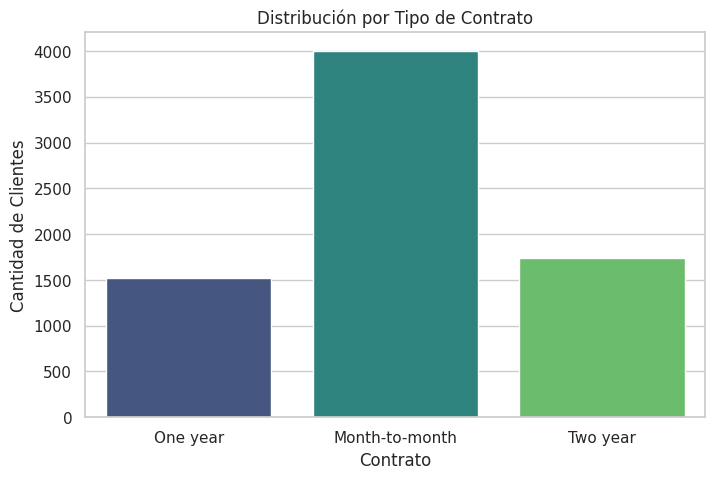

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el estilo visual
sns.set_theme(style="whitegrid")

# Ejemplo: Distribución del tipo de contrato
plt.figure(figsize=(8, 5))
sns.countplot(data=df_tel, x='contract', palette='viridis')
plt.title('Distribución por Tipo de Contrato')
plt.xlabel('Contrato')
plt.ylabel('Cantidad de Clientes')
plt.show();

/tmp/ipython-input-3179701760.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_tel, x='gender', palette='viridis')


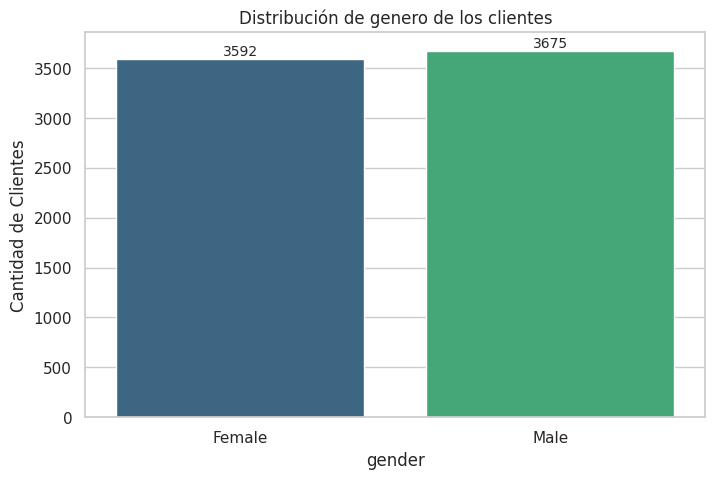

In [25]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_tel, x='gender', palette='viridis')
plt.title('Distribución de genero de los clientes')
plt.ylabel('Cantidad de Clientes')

# Añadir etiquetas de valor encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, int(height),
            ha='center', va='bottom', fontsize=10)

plt.show();


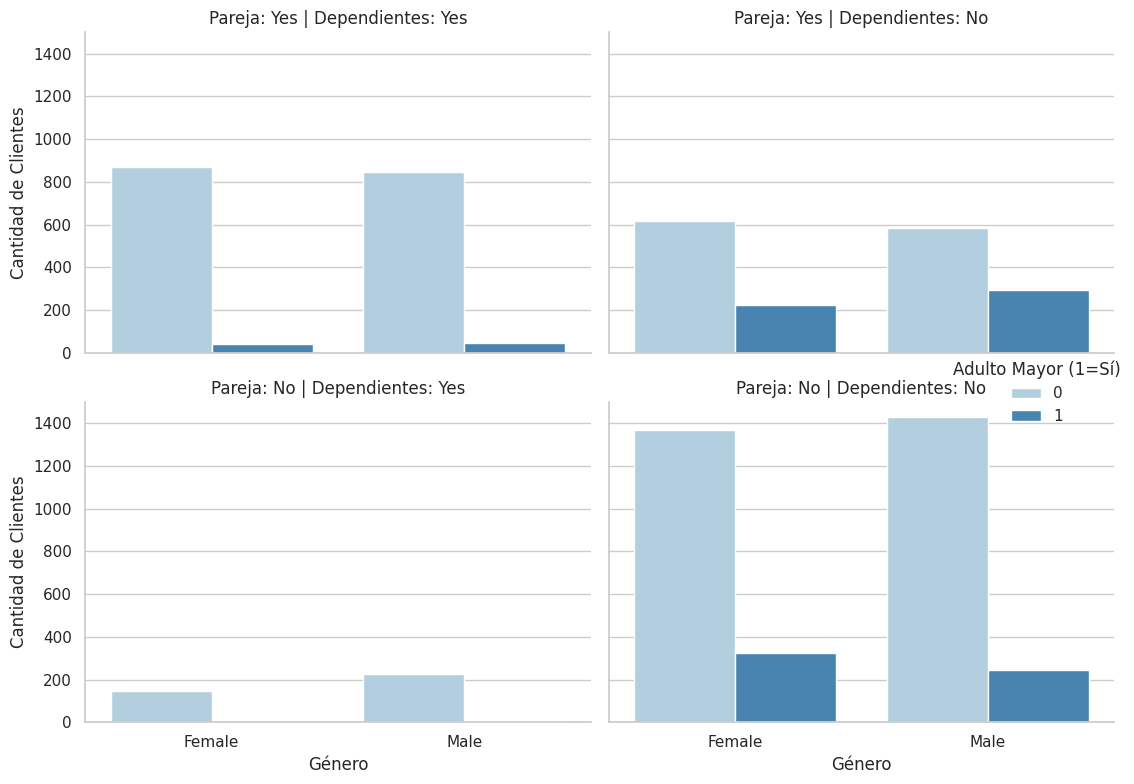

In [26]:
# Creamos una cuadrícula: Filas para 'partner' y Columnas para 'dependents'
g = sns.FacetGrid(df_tel, row='partner', col='dependents', height=4, aspect=1.2)

# Mapeamos un gráfico de barras (countplot) para 'gender' y 'seniorcitizen'
# Usamos hue='seniorcitizen' para ver la proporción de adultos mayores en cada grupo
g.map_dataframe(sns.countplot, x='gender', hue='seniorcitizen', palette='Blues')

# Ajustes estéticos
g.set_axis_labels("Género", "Cantidad de Clientes")
g.set_titles(row_template="Pareja: {row_name}", col_template="Dependientes: {col_name}")
g.add_legend(title="Adulto Mayor (1=Sí)")
plt.tight_layout()
plt.show()

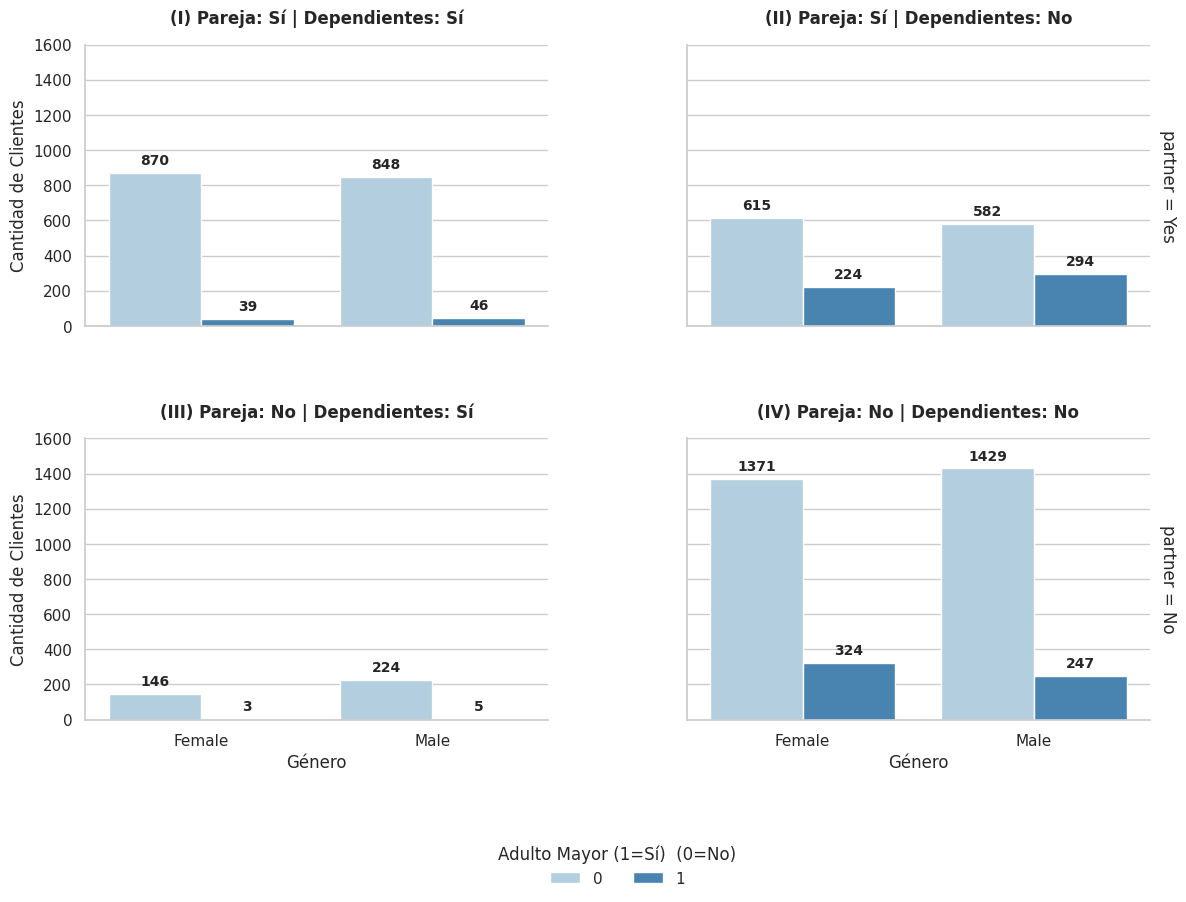

In [27]:
# Función mejorada: solo etiqueta valores mayores a 0
def annotate_bars(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0: # Condición para no mostrar el cero
            ax.annotate(format(height, '.0f'),
                        (p.get_x() + p.get_width() / 2., height),
                        ha = 'center', va = 'center',
                        xytext = (0, 9),
                        textcoords = 'offset points',
                        fontsize=10, fontweight='bold')

# Configuramos el FacetGrid con más espacio (gridspec_kws)
g = sns.FacetGrid(df_tel, row='partner', col='dependents',
                  height=4.5, aspect=1.2,
                  margin_titles=True)

# Mapeamos el gráfico
g.map_dataframe(sns.countplot, x='gender', hue='seniorcitizen', palette='Blues')

# Personalizamos títulos con numeración Romana
titles = ["(I) Pareja: Sí | Dependientes: Sí", "(II) Pareja: Sí | Dependientes: No",
          "(III) Pareja: No | Dependientes: Sí", "(IV) Pareja: No | Dependientes: No"]

for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title, fontweight='bold', pad=15)
    annotate_bars(ax) # Aplicamos las etiquetas de valores
    ax.set_ylim(0, 1600) # Ajustamos el límite para que quepan los números

# Ajustamos etiquetas de ejes
g.set_axis_labels("Género", "Cantidad de Clientes")

# Configuramos la leyenda en la parte inferior
g.add_legend(title="Adulto Mayor (1=Sí)  (0=No)", loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2)

# Aumentamos la separación entre gráficos (wspace para ancho, hspace para alto)
plt.subplots_adjust(top=0.9, bottom=0.15, left=0.1, right=0.9, hspace=0.4, wspace=0.3)

plt.show()

### INTERPRETACIÓN

- Gráfico (I) - (Pareja: Sí | Dependientes: Sí) : grupo donde el género está más equilibrado y hay menos adultos mayores, muy pocos adultos mayores tienen dependientes e hijos al mismo tiempo.

- Gráfico (II) - (Pareja: Sí | Dependientes: No): Son Parejas sin hijos. Aquí empezamos a ver más barras oscuras con respecto a Gráfico I (adultos mayores).

- Gráfico (III) - (Pareja: No | Dependientes: Sí): Es el grupo de Padres o Madres solteros. Es el grupo más pequeño de todos.

- Gráfico (IV) - (Pareja: No | Dependientes: No): Son los Clientes Independientes. Es el grupo más masivo.

Grafico de caja: ¿cual de los 4 grupos es mas rentable?

Para poder comparar a los grupos lod denotare por:
(I) Familiar
(II) Sin Hijos
(III) Monoparental
(IV) Independientes

/tmp/ipython-input-1410839867.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tel, x='grupo_perfil', y='charges.monthly',


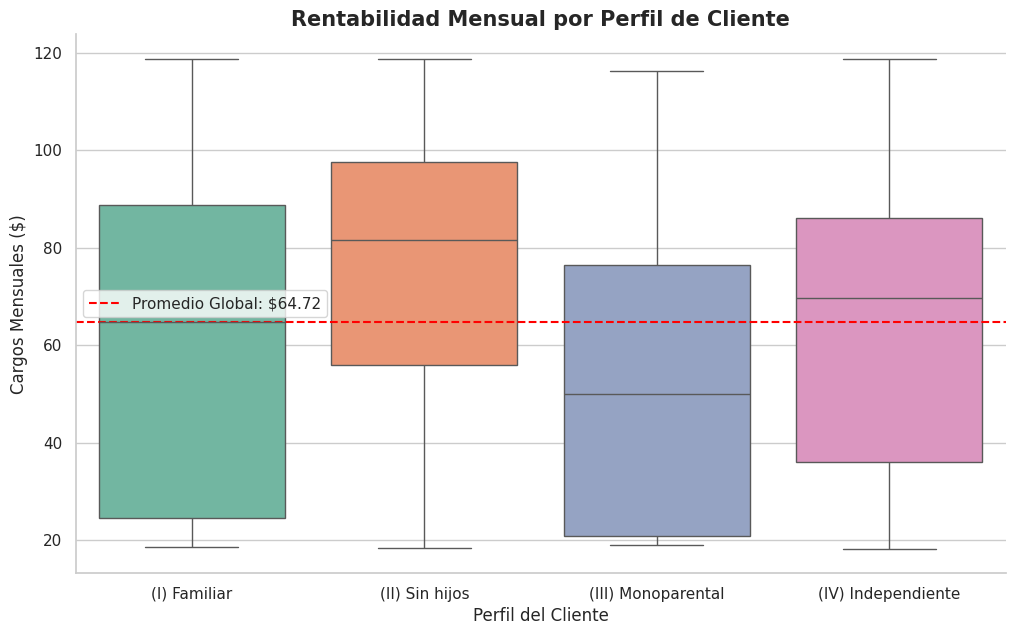

In [28]:
# Creamos una columna temporal de 'Grupo' para facilitar la visualización
def asignar_grupo(row):
    if row['partner'] == 'Yes' and row['dependents'] == 'Yes': return '(I) Familiar'
    if row['partner'] == 'Yes' and row['dependents'] == 'No': return '(II) Sin hijos'
    if row['partner'] == 'No' and row['dependents'] == 'Yes': return '(III) Monoparental'
    return '(IV) Independiente'

df_tel['grupo_perfil'] = df_tel.apply(asignar_grupo, axis=1)

# Configuración del gráfico
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_tel, x='grupo_perfil', y='charges.monthly',
            order=['(I) Familiar', '(II) Sin hijos', '(III) Monoparental', '(IV) Independiente'],
            palette='Set2')

# Añadir una línea con el promedio general para comparar
plt.axhline(df_tel['charges.monthly'].mean(), color='red', linestyle='--', label=f'Promedio Global: ${df_tel["charges.monthly"].mean():.2f}')

plt.title('Rentabilidad Mensual por Perfil de Cliente', fontsize=15, fontweight='bold')
plt.xlabel('Perfil del Cliente', fontsize=12)
plt.ylabel('Cargos Mensuales ($)', fontsize=12)
plt.legend()

# Limpieza de bordes
sns.despine()
plt.show()

In [29]:
# Cálculo exacto de rentabilidad por grupo
rentabilidad = df_tel.groupby('grupo_perfil')['charges.monthly'].agg(['mean', 'median', 'std']).round(2)
print("Resumen de Rentabilidad por Grupo:")
print(rentabilidad.sort_values(by='mean', ascending=False))

Resumen de Rentabilidad por Grupo:
                     mean  median    std
grupo_perfil                            
(II) Sin hijos      74.95   81.50  28.33
(IV) Independiente  62.96   69.70  28.95
(I) Familiar        60.89   64.75  31.73
(III) Monoparental  52.26   50.08  28.53


1. Grupo mas Rentable: (II) Sin hijos
Este es tu perfil más rentable. Los clientes con pareja pero sin dependientes tienden a gastar mucho más. Es probable que este grupo tenga mayor ingreso disponible para contratar planes de alta velocidad o servicios premium.

2. El Grupo (IV) Independiente
Cerca del promedio: La caja es bastante alta, lo que indica que en este grupo es variado, planes basicos hasta usuarios activos de internet.

3. Greupo (I) Familiar : La mediana está justo sobre el promedio global. Esto podría indicar que buscan planes con buena relación costo-beneficio para el hogar, sin excederse en extras.

4. Grupo (III) Monoparental: Es el perfil con menor rentabilidad. Su mediana es la más baja de todo el gráfico. Este grupo parece ser el más sensible al precio, posiblemente contratando solo servicios esenciales.

##DISTRIBUCIÓN DE EVASION

### ANALSISIS DE HIPOTESIS DE ABANDONO POR PARTE DE CLIENTES

- tenure (La Antigüedad): Los clientes en sus primeros meses tienen una probabilidad mucho mayor de irse porque aún no han creado un hábito de fifelización con la marca.

- Contract (Contrato): Los clientes con contrato "Month-to-month" (mes a mes) no tienen barreras de salida financieras. A diferencia de los contratos de 1 o 2 años, estos clientes pueden irse en cualquier momento sin penalizaciones.

- InternetService (Tipo de Internet): Si un grupo técnico por ejemplo, Fibra Óptica, tiene cargos muy altos pero experimenta fallas, podrías ver un alto churn. Por el contrario, los clientes sin internet suelen ser más estables pero menos rentables.

- Soporte Técnico (OnlineSecurity, TechSupport): Los clientes que no tienen contratados estos servicios adicionales pueden frustrarse más rápido cuando tienen un problema técnico, lo que acelera su decisión de abandono

- PaymentMethod (Método de Pago): Los clientes que pagan con "Electronic check" suelen tener tasas de abandono más altas que aquellos con pagos automáticos (tarjeta de crédito o transferencia bancaria), donde el cobro es "invisible" y menos propenso a olvidos o rechazos.

- PaperlessBilling (Facturación Electrónica): A veces, los clientes que reciben facturas físicas tienen un recordatorio constante del gasto, lo que puede llevarlos a replantearse el servicio más frecuentemente que quienes tienen facturación digital

- Partner y Dependents: Como vimos en los gráficos, los clientes Independientes (sin pareja ni hijos) suelen tener menos "anclas" y Un hogar con familia completa suele evitar el trámite de cambiar de proveedor para no interrumpir el servicio de todos los integrantes. (perspectiva Personal)

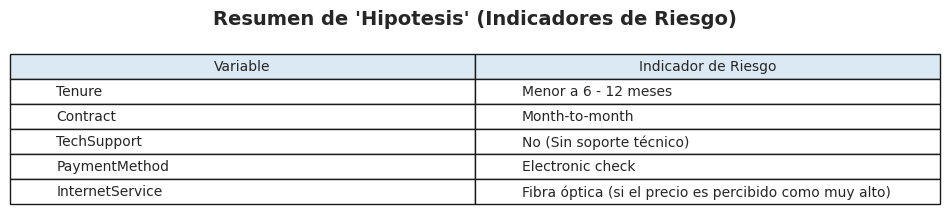

In [30]:
#creando una tabla resumen de indicativospara posibles clientes que dejen los servicios de Telecomx
column_labels = ["Variable", "Indicador de Riesgo"]
table_data = [
    ["Tenure", "Menor a 6 - 12 meses"],
    ["Contract", "Month-to-month"],
    ["TechSupport", "No (Sin soporte técnico)"],
    ["PaymentMethod", "Electronic check"],
    ["InternetService", "Fibra óptica (si el precio es percibido como muy alto)"]
]

fig, ax = plt.subplots(figsize=(12, 2))
ax.axis('off')  # Oculta los ejes

# Crear tabla
table = ax.table(cellText=table_data,
                 colLabels=column_labels,
                 cellLoc='left',
                 loc='center',
                 colColours=["#dbe9f4", "#dbe9f4"])

# Estilo de la tabla
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Título
plt.title("Resumen de 'Hipotesis' (Indicadores de Riesgo)", fontsize=14, fontweight='bold', pad=20)

plt.show()


### Tipos de contrato

In [31]:
# Analizamos el tipo de contrato frente a la antigüedad promedio
analisis_contrato = df_tel.groupby('contract').agg({
    'tenure': 'mean',
    'charges.monthly': 'mean',
    'customerid': 'count'
}).rename(columns={'customerid': 'total_clientes'}).round(2)

print("Análisis por Tipo de Contrato:")
print(analisis_contrato)

Análisis por Tipo de Contrato:
                tenure  charges.monthly  total_clientes
contract                                               
Month-to-month   18.00            66.34            4005
One year         42.19            65.23            1519
Two year         56.74            60.54            1743


Como podemos ver en la tabla, 4005 clientes tienen un contrato mes a mes, que tienen una antiguedad promedio de solo 18 meses, comparado con los 57 meses de contrato por dos años, lo que indica que tenemos a la mayoria de clientes que no tienen barreras de salida si ka competencia les presenta una oferta mejor

Los clientes con contrato de Two year son los más fieles, con una permanencia promedio de 57 meses (casi 5 años).

ademas, son los que pagan un promedio mensual menor ($60.54). Esto sugiere que la empresa ofrece descuentos por lealtad o contratos largos, y que estos clientes valoran más la estabilidad y el precio bajo que la flexibilidad de irse.

In [32]:
# Creando GRUPOS de antigüedad para identificar el riesgo
def segmentar_tenure(meses):
    if meses <= 12: return '0-12 meses (Riesgo Crítico)'
    elif meses <= 24: return '13-24 meses (Riesgo Medio)'
    elif meses <= 48: return '25-48 meses (Estable)'
    else: return '49-72 meses (Leal)'

df_tel['tenure_group'] = df_tel['tenure'].apply(segmentar_tenure)

# Vemos cuántos clientes hay en cada fase
resumen_tenure = df_tel['tenure_group'].value_counts().sort_index()
print(resumen_tenure)

tenure_group
0-12 meses (Riesgo Crítico)    2265
13-24 meses (Riesgo Medio)     1045
25-48 meses (Estable)          1648
49-72 meses (Leal)             2309
Name: count, dtype: int64


In [33]:
# Cruzamos Contrato con Grupos de Antigüedad
cross_tenure_contract = pd.crosstab(df_tel['tenure_group'], df_tel['contract'], normalize='index') * 100
print("Porcentaje de tipo de contrato por antigüedad:")
print(cross_tenure_contract.round(2))

Porcentaje de tipo de contrato por antigüedad:
contract                     Month-to-month  One year  Two year
tenure_group                                                   
0-12 meses (Riesgo Crítico)           91.30      5.61      3.09
13-24 meses (Riesgo Medio)            71.96     19.14      8.90
25-48 meses (Estable)                 50.55     32.34     17.11
49-72 meses (Leal)                    15.24     28.54     56.21


Como vemos en la tabala cruzada, Casi todos los que entran a la empresa lo hacen "a prueba". Solo un 3% se atreve a firmar por dos años desde el inicio. Lo que indica que el el mayor volumen de clientes nuevos son tambien los mas inestables, Los clientes que sobreviven a los primeros dos años son los que finalmente son muy fieles con la empresa mediante contratos largos.


ANALSISIS DE SOPORTE TECNICO EN GEUPOS DE RIESGO

In [34]:
# Filtramos solo por los servicios de internet (ya que los que no tienen internet no tienen soporte)
df_internet = df_tel[df_tel['internetservice'] != 'No']

# Cruzamos el Grupo de Antigüedad con el Soporte Técnico
soporte_riesgo = pd.crosstab(df_internet['tenure_group'], df_internet['techsupport'], normalize='index') * 100
print("¿Tienen Soporte Técnico según su antigüedad?")
print(soporte_riesgo.round(2))

¿Tienen Soporte Técnico según su antigüedad?
techsupport                     No    Yes
tenure_group                             
0-12 meses (Riesgo Crítico)  83.04  16.96
13-24 meses (Riesgo Medio)   72.53  27.47
25-48 meses (Estable)        60.88  39.12
49-72 meses (Leal)           41.62  58.38


tenemos que 83.04% los clientes que ante el primer fallo de internet no tienen a quién llamar y no tienen ninguna penalización por cancelar el servicio. son justamente propoensos a abandonar la empresa, ademas No necesariamente los clientes antiguos decidan contratar soporte después 58.38%, sino que solo los clientes que tienen soporte técnico sobreviven lo suficiente para llegar a ser "Leales". Los que no lo tienen, se van mucho antes.

## DISTRIBUCIÓN DE LA EVASIÓN

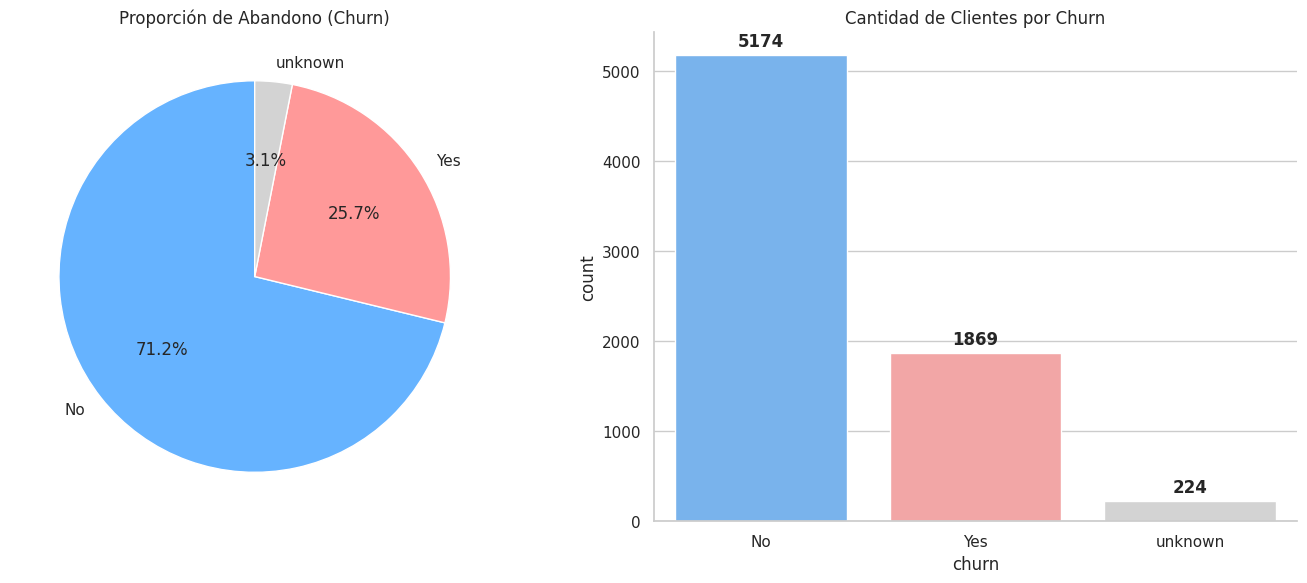

In [35]:
#CATEGORIAS
churn_counts = df_tel['churn'].value_counts()

# 2. Definimos una paleta de 3 colores
# Azul (No), Rosa (Yes), Gris (unknown)
colores = ['#66b3ff', '#ff9999', '#d3d3d3']

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de Pastel
ax[0].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colores)
ax[0].set_title('Proporción de Abandono (Churn)')

# Gráfico de Barras
# Usamos hue='churn' para evitar el Warning de futuras versiones
sns.countplot(data=df_tel, x='churn', ax=ax[1], hue='churn', palette=colores, legend=False)
ax[1].set_title('Cantidad de Clientes por Churn')

# Etiquetas de valor sobre las barras
for p in ax[1].patches:
    height = p.get_height()
    if height > 0:
        ax[1].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontweight='bold')

sns.despine()
plt.tight_layout()
plt.show()

## Recuento de evasión por variables categóricas

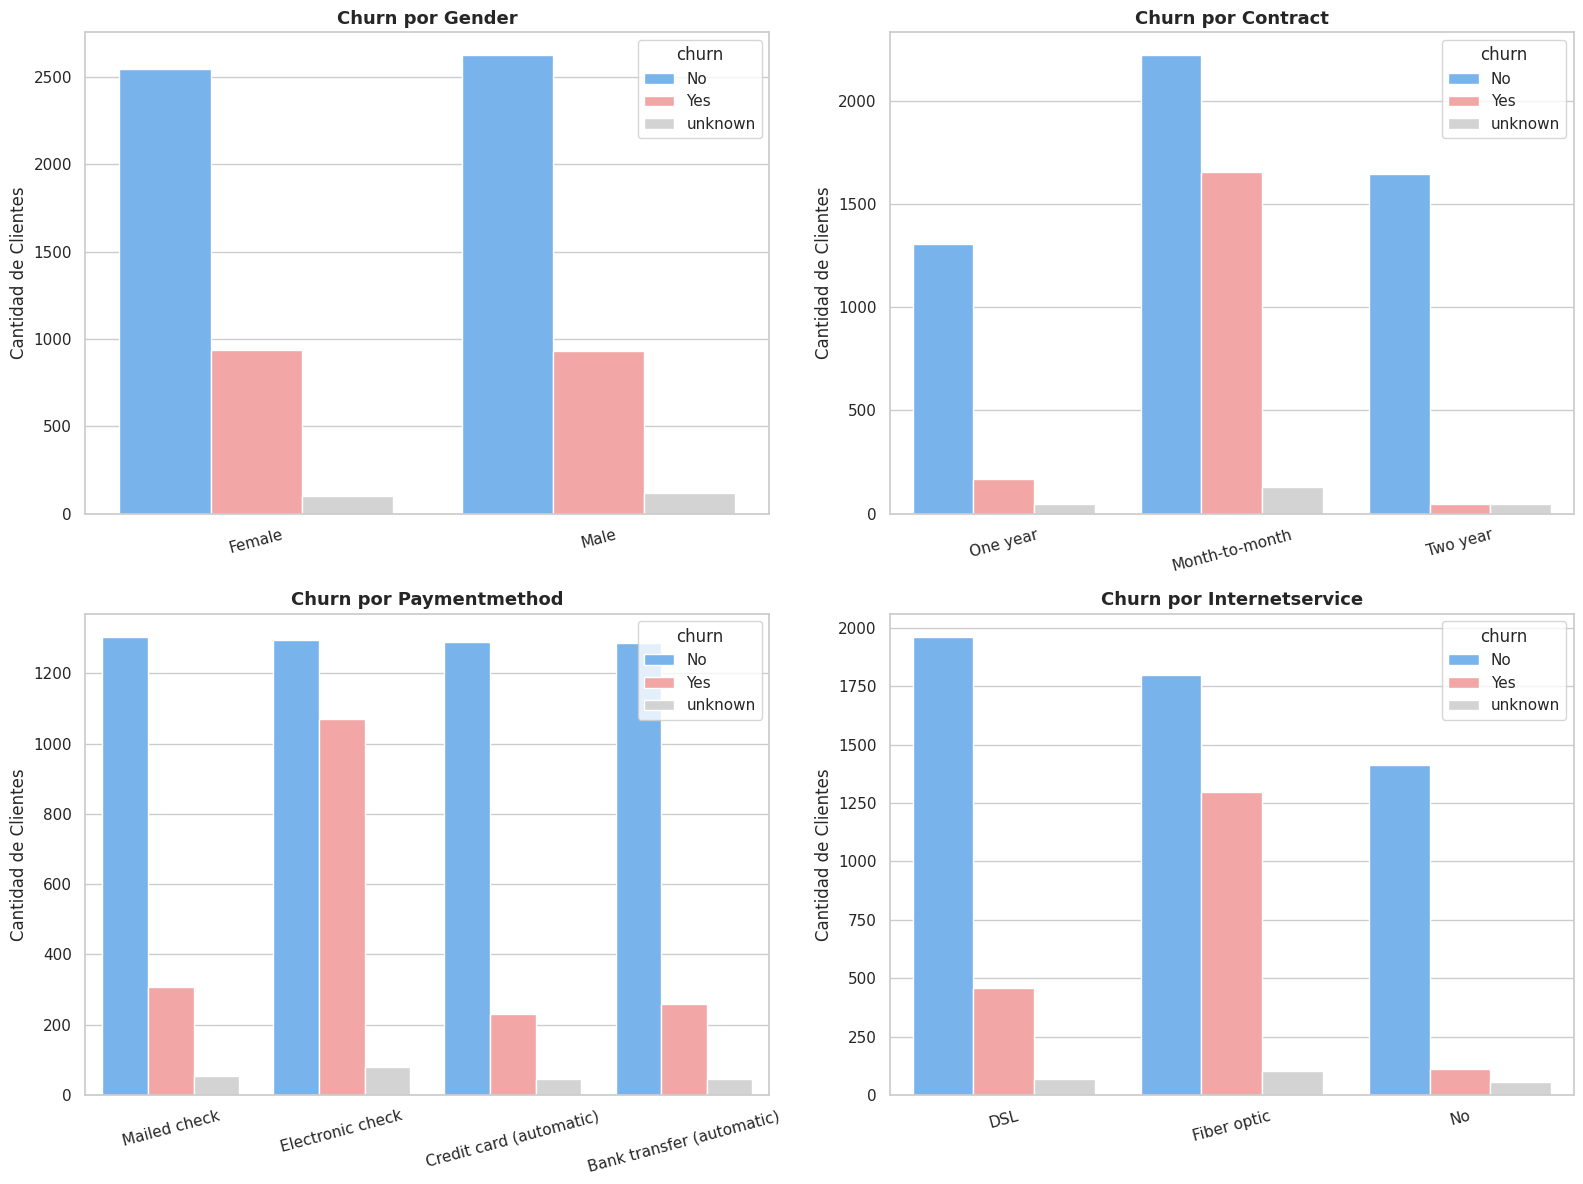

In [36]:
# Definimos las variables que queremos explorar
variables_cat = ['gender', 'contract', 'paymentmethod', 'internetservice']

# Configuramos la cuadrícula de gráficos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flat

for i, col in enumerate(variables_cat):
    # Creamos el gráfico de barras comparativo
    sns.countplot(data=df_tel, x=col, hue='churn', ax=axes[i], palette=['#66b3ff', '#ff9999', '#d3d3d3'])

    axes[i].set_title(f'Churn por {col.capitalize()}', fontsize=13, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Cantidad de Clientes')
    axes[i].tick_params(axis='x', rotation=15) # Rotamos etiquetas para lectura fácil

plt.tight_layout()
plt.show()

ESTE GRAFICO NOS DA MAS PISTAS, confirma de forma masiva que el contrato mensual es la puerta de salida principal, ademas los usuarios de Fibra Óptica tienen una tasa de abandono desproporcionadamente alta en comparación con DSL o quienes no tienen internet.

- Vimos que el 83% de los nuevos no tienen TechSupport. La fibra es una tecnología más compleja; si falla y el cliente no tiene soporte, se frustra más rápido. Por otro lado, al ser el servicio más caro, cualquier fallo técnico hace que el cliente sienta que "no está recibiendo lo que paga" y aprovecha su contrato mensual para irse.

- el método de pago Electronic Check tiene un alto Churn. Los métodos automáticos (Credit Card y Bank Transfer) tienen un Churn bajísimo. Esto sugiere que la fricción de tener que pagar manualmente cada mes aumenta la probabilidad de que el cliente decida cancelar.

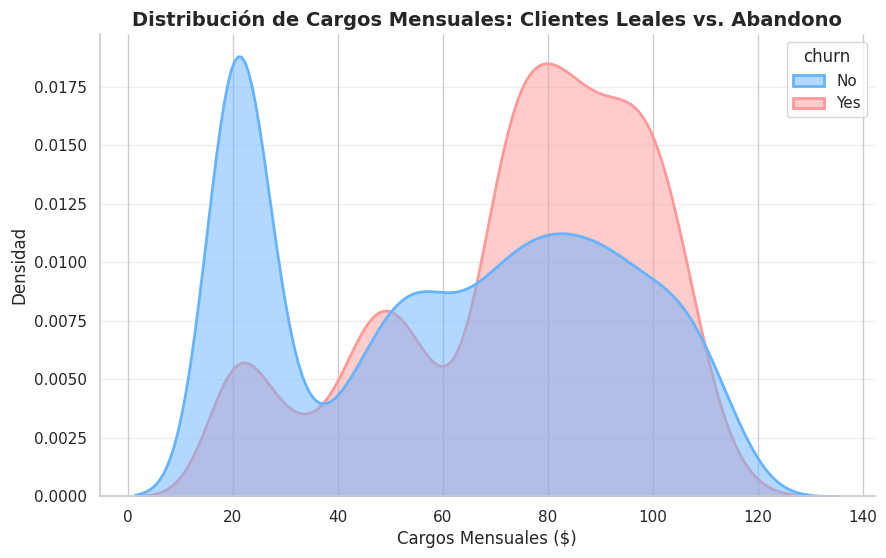

In [37]:
plt.figure(figsize=(10, 6))

# Filtramos los datos para excluir los 'unknown' y tener una comparativa limpia
df_plot = df_tel[df_tel['churn'].isin(['Yes', 'No'])]

# Creamos el gráfico de densidad
sns.kdeplot(data=df_plot, x='charges.monthly', hue='churn',
            fill=True, common_norm=False, palette=['#66b3ff', '#ff9999'],
            alpha=.5, linewidth=2)

# Añadimos detalles estéticos
plt.title('Distribución de Cargos Mensuales: Clientes Leales vs. Abandono', fontsize=14, fontweight='bold')
plt.xlabel('Cargos Mensuales ($)')
plt.ylabel('Densidad')
plt.grid(axis='y', alpha=0.3)

sns.despine()
plt.show()

el grafico superior nos indica que estamos perdiendo a los clientes que mas pagan, [75 - 100] mensual, La Fibra Óptica, al ser el servicio más caro, genera una expectativa de calidad que el cliente percibe que no se cumple, y al estar con contratos mes a mes y sin soporte, se produce abandono

### Conteo de evasión por variables numéricas

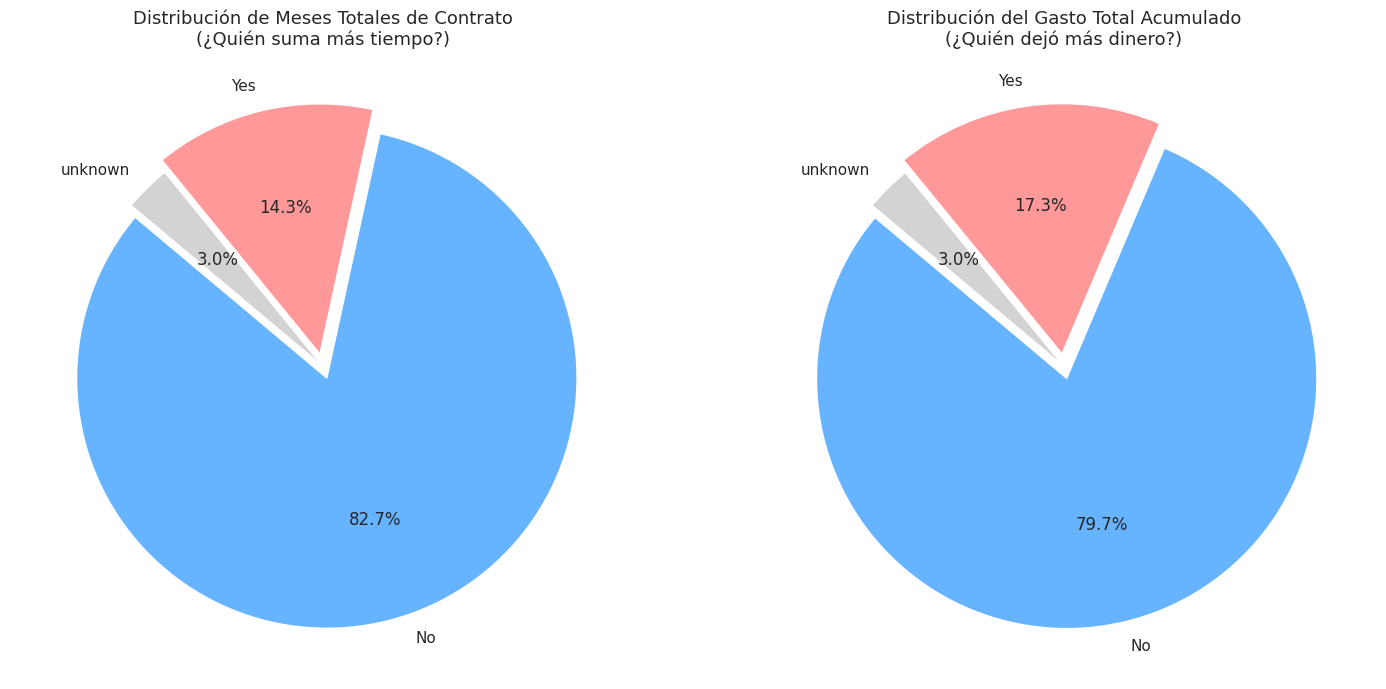

In [41]:
# 1. Calculamos las sumas por grupo de Churn
sumas_churn = df_box.groupby('churn')[['tenure', 'charges.total']].sum()

# 2. Configuración de los gráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
colores = ['#66b3ff', '#ff9999', '#d3d3d3']

# Gráfico 1: Distribución de la Antigüedad Total (Meses acumulados)
axes[0].pie(sumas_churn['tenure'], labels=sumas_churn.index, autopct='%1.1f%%',
            startangle=140, colors=colores, explode=(0.05, 0.05, 0))
axes[0].set_title('Distribución de Meses Totales de Contrato\n(¿Quién suma más tiempo?)', fontsize=13)

# Gráfico 2: Distribución del Gasto Total (Dinero acumulado)
axes[1].pie(sumas_churn['charges.total'], labels=sumas_churn.index, autopct='%1.1f%%',
            startangle=140, colors=colores, explode=(0.05, 0.05, 0))
axes[1].set_title('Distribución del Gasto Total Acumulado\n(¿Quién dejó más dinero?)', fontsize=13)

plt.tight_layout()
plt.show()

1. el grupo "No" se lleva la gran mayoría del pastel 82.7%, los clientes leales acumulan años de contrato, mientras que los que se van lo hacen rápido que apenas consiguen una porción del tiempo total.

2. El porcentaje de dinero perdido (17.3%) nos indica que la mayoría de los que se van son clientes nuevos que no tuvieron tiempo de dejar mucho dinero acumulado.

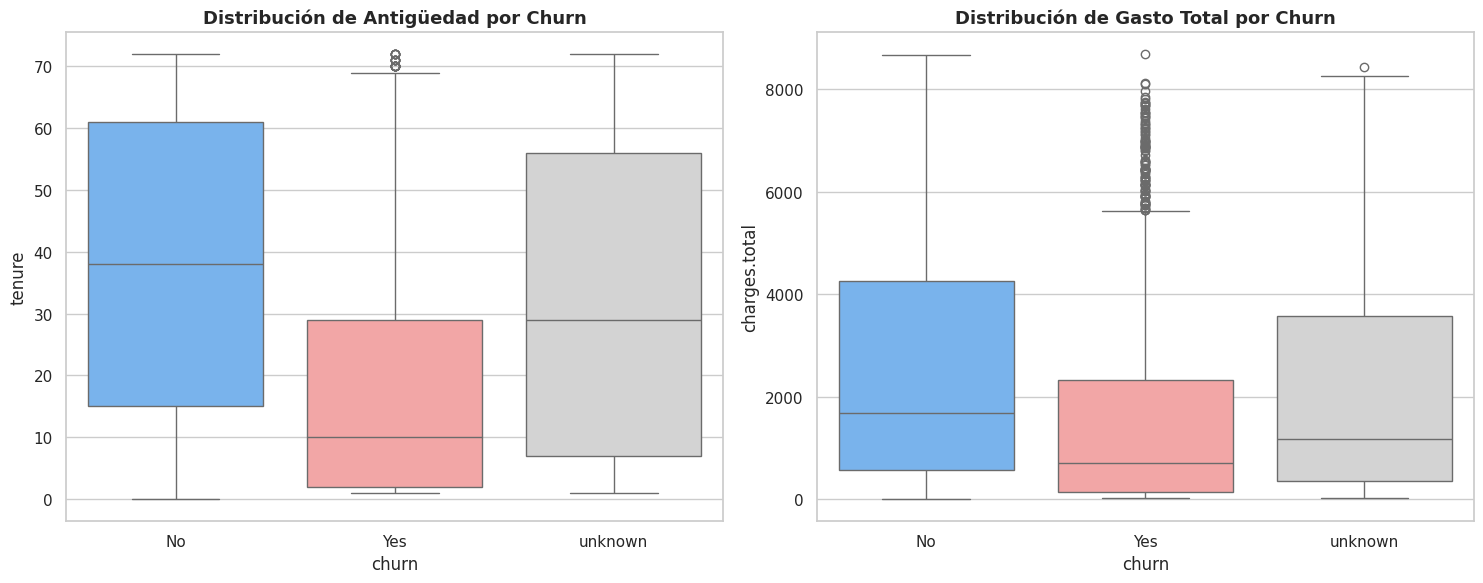

In [39]:
# La convertimos a numérica manejando espacios vacíos
col_total = 'charges.total' # Cámbialo si el print muestra algo distinto

df_tel[col_total] = pd.to_numeric(df_tel[col_total], errors='coerce')
df_box = df_tel.dropna(subset=[col_total])




fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de Antigüedad
sns.boxplot(data=df_box, x='churn', y='tenure', ax=axes[0], palette=['#66b3ff', '#ff9999', '#d3d3d3'], hue='churn', legend=False)
axes[0].set_title('Distribución de Antigüedad por Churn', fontsize=13, fontweight='bold')

# Gráfico de Cargos Totales (Usando la variable que identificamos)
sns.boxplot(data=df_box, x='churn', y=col_total, ax=axes[1], palette=['#66b3ff', '#ff9999', '#d3d3d3'], hue='churn', legend=False)
axes[1].set_title('Distribución de Gasto Total por Churn', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

1. la línea central de la caja rosa está cerca de los 10 meses. Esto confirma que la mitad de los clientes que se van no llegan a cumplir ni un año en la empresa.

Mientras que los clientes leales (No) tienen una distribución muy amplia que llega hasta los 72 meses, los que se van están "comprimidos" en la parte baja del gráfico.

El riesgo de fuga es inversamente proporcional al tiempo. Si se logra que el cliente pase la barrera de los 24 meses (donde termina la caja rosa), es mas probable de que se quede a largo plazo

2. La caja rosa del gasto total es mucho más baja que la azul. Esto sucede porque, como se van rápido, no alcanzan a sumar grandes facturas.

## IMPACTO ECONOMICO

In [40]:
# pérdida de ingresos mensual por los clientes que se fueron
churn_yes = df_tel[df_tel['churn'] == 'Yes']
perdida_mensual = churn_yes['charges.monthly'].sum()

# promedio de lo que pagaba cada cliente que se fue
pago_promedio_fuga = churn_yes['charges.monthly'].mean()

print(f"PÉRDIDA MENSUAL TOTAL: ${perdida_mensual:,.2f}")
print(f"PAGO PROMEDIO DEL CLIENTE QUE SE VA: ${pago_promedio_fuga:,.2f}")

PÉRDIDA MENSUAL TOTAL: $139,130.85
PAGO PROMEDIO DEL CLIENTE QUE SE VA: $74.44


Estamos ante una crisis de retención en el segmento de mayor valor. Aunque el 25.7% de los clientes se va, el impacto financiero es desproporcionado  ya que cada cliente que perdemos le quita a la empresa un promedio de 74.44 mensuales, sumando una pérdida total que supera los 139,130.85 cada mes. La mayoría de esta fuga ocurre en los primeros 12 meses y está ligada directamente al servicio de Fibra Óptica sin soporte técnico adecuado

# Informe Final del Análisis

1. Introducción
El objetivo de este análisis es identificar los factores críticos que impulsan la evasión de clientes (Churn) en la compañía de telecomunicaciones. La pérdida de clientes no solo afecta el flujo de caja actual, sino que representa una pérdida de capital invertido en adquisición de clientes (CAC). Este estudio busca transformar datos brutos en insights accionables para reducir la tasa de abandono y optimizar la rentabilidad.

2. Limpieza y Tratamiento de Datos
Para asegurar la integridad del análisis, se realizaron los siguientes pasos:

Importación y Verificación: Se cargó el dataset detectando columnas clave como tenure, charges.monthly y churn.

Estandarización de Tipos: Se identificó que la columna de cargos totales contenía valores no numéricos (espacios vacíos). Se utilizó pd.to_numeric(errors='coerce') para corregirlos.

Tratamiento de Nulos: Se eliminaron las filas con datos faltantes en variables críticas para evitar sesgos en los cálculos de impacto económico.

Segmentación: Se crearon grupos de antigüedad (tenure_group) para facilitar la identificación de perfiles de riesgo.

3. Análisis Exploratorio de Datos (EDA)
A través de las visualizaciones, identificamos tres patrones determinantes:

A. Perfil de Riesgo Temporal
La mayoría de las bajas ocurren en el primer año. Los clientes en el grupo de 0-12 meses muestran una falta de compromiso estructural (Contratos mes a mes) y una alta vulnerabilidad ante fallas técnicas.

B. La Paradoja de la Fibra Óptica
Aunque es nuestro producto de mayor valor, es el que presenta mayor tasa de evasión. Los clientes pagan más, pero al no contar con Soporte Técnico (solo el 16% de los nuevos lo tiene), abandonan el servicio ante la primera incidencia.

C. El Factor del Método de Pago
El método de Electronic Check actúa como un disparador de abandono. A diferencia de los métodos automáticos, este requiere una acción manual mensual que aumenta la fricción y la probabilidad de cancelación.

4. Conclusiones e Insights
Impacto Financiero Crítico: El Churn nos cuesta $139,130.85 mensuales. Al año, esto representa una fuga de más de 1.6 millones.

Pérdida de Clientes de Alto Valor: Los clientes que se van pagan un promedio de $74.44, mientras que los leales suelen estar en rangos de precios más bajos o servicios básicos. TELECOMX esta perdiendo a los clientes más rentables.

Vulnerabilidad Inicial: El 83% de los clientes nuevos no tiene soporte técnico, dejándolos desprotegidos en la etapa más crítica de su relación con la marca.

5. Recomendaciones Estratégicas:
- Programa "Primeros Pasos Seguros": Incluir de manera gratuita el servicio de Soporte Técnico por los primeros 6 meses en todos los nuevos contratos de Fibra Óptica. Esto actúa como un "ancla" de confianza.

- Incentivo a la Automatización: Lanzar una campaña de marketing ofreciendo un pequeño descuento único o beneficio por migrar de Electronic Check a Pagos Automáticos (Tarjeta de Crédito/Banco).

- Conversión de Contratos: Identificar a clientes en el mes 10 u 11 de su contrato mensual y ofrecerles un aumento de velocidad o servicio a cambio de migrar a un contrato anual.

- Crear un sistema de alertas para el equipo de atencion al cliente, cuando un cliente con factura superior a $70 presente una queja técnica, priorizando su resolución en menos de 24 horas.